<a href="https://colab.research.google.com/github/YoshB/Quantization/blob/main/Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantization of images using k-means algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mtp_image

from sklearn.cluster import KMeans

Load the image

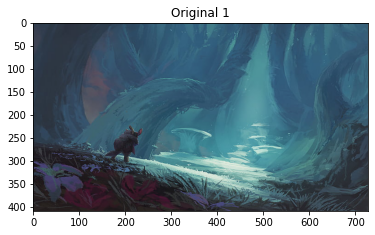

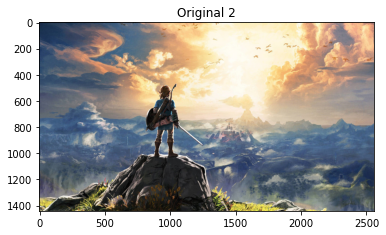

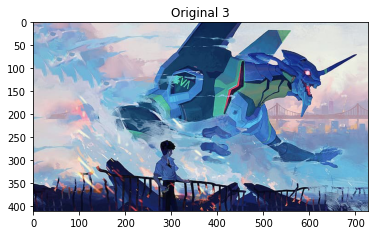

In [2]:
#Path of the images
im_1_path = "Image_1.jpg"
im_2_path = "Image_2.jpg"
im_3_path = "Image_3.jpg"


#load images
im1 = mtp_image.imread(im_1_path)
im2 = mtp_image.imread(im_2_path)
im3 = mtp_image.imread(im_3_path)

w1, h1,d = im1.shape
w2, h2,d = im2.shape
w3, h3,d = im3.shape

x1 = np.reshape(im1,(w1*h1,d))
x2 = np.reshape(im2,(w2*h2,d))
x3 = np.reshape(im3,(w3*h3,d))

# Number of colors that we want the images to have
n1_colors = 4
n2_colors = 5
n3_colors = 6

plt.figure(); plt.title("Original 1")
plt.imshow(im1)
plt.figure(); plt.title("Original 2")
plt.imshow(im2)
plt.figure(); plt.title("Original 3")
plt.imshow(im3)

plt.show()

Hacemos la cuantización

In [3]:
#Funtion to train the model using k-means
def Cuant(clusters, x, w, h):
  model = KMeans(n_clusters= clusters)
  model.fit(x)
  y_pred = model.predict(x)

  C = model.cluster_centers_
  I = np.reshape(y_pred, (w, h))
  return C, I

def Cuant_Image(C,I, w, h):
  img_out = np.zeros((w,h,3))

  for i in range(w):
    for j in range(h):
      img_out[i,j][0] = C[I[i,j]][0]
      img_out[i,j][1] = C[I[i,j]][1]
      img_out[i,j][2] = C[I[i,j]][2]
  return img_out

C1, I1 = Cuant(n1_colors, x1, w1, h1)
C2, I2 = Cuant(n2_colors, x2, w2, h2)
C3, I3 = Cuant(n3_colors, x3, w3, h3)


In [4]:
new_Im1 = Cuant_Image(C1, I1, w1, h1)
new_Im1 = new_Im1.astype(int)
new_Im2 = Cuant_Image(C2, I2, w2, h2)
new_Im2 = new_Im2.astype(int)
new_Im3 = Cuant_Image(C3, I3, w3, h3)
new_Im3 = new_Im3.astype(int)


Show the image

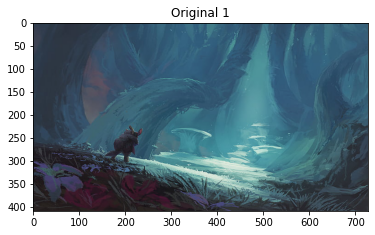

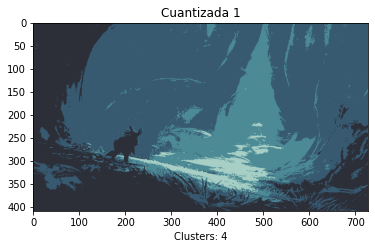

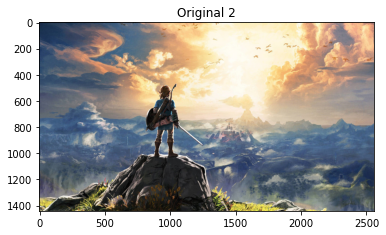

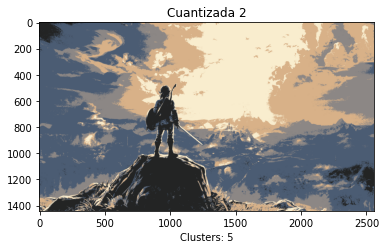

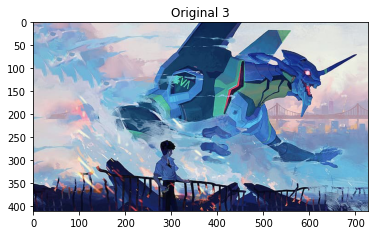

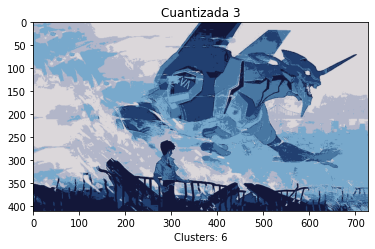

In [5]:

plt.figure(); plt.title("Original 1"); 
plt.imshow(im1)
plt.figure(); plt.title("Cuantizada 1"); plt.xlabel("Clusters: "+ str(n1_colors))

plt.imshow(new_Im1)
plt.show()

plt.figure(); plt.title("Original 2"); 
plt.imshow(im2)
plt.figure(); plt.title("Cuantizada 2"); plt.xlabel("Clusters: "+ str(n2_colors))

plt.imshow(new_Im2)
plt.show()

plt.figure(); plt.title("Original 3"); 
plt.imshow(im3)
plt.figure(); plt.title("Cuantizada 3"); plt.xlabel("Clusters: "+ str(n3_colors))

plt.imshow(new_Im3)
plt.show()